# 文書風のサンプル画像の生成コード メモ

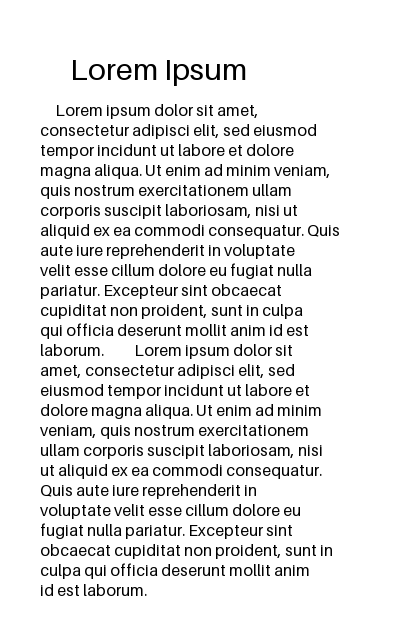

In [6]:
from PIL import Image, ImageDraw, ImageFont
import textwrap

def create_image() -> Image:
    width, height = 400, 640
    image = Image.new('L', (width, height), 'white')  # 'L'はグレースケールを意味します
    draw = ImageDraw.Draw(image)
    
    # タイトルを描画
    title = "Lorem Ipsum"
    font = ImageFont.load_default(size=30)
    title_x, title_y = 70, 50
    draw.text((title_x, title_y), title, fill="black", font=font)
    
    # 本文を描画
    dummy_text = """
    Lorem ipsum dolor sit amet, consectetur adipisci elit, sed eiusmod tempor incidunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrum exercitationem ullam corporis suscipit laboriosam, nisi ut aliquid ex ea commodi consequatur. Quis aute iure reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint obcaecat cupiditat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
    """
    # テキストを指定された幅で折り返す
    body = textwrap.fill(dummy_text * 2, width=40)
    font = ImageFont.load_default(size=16)
    body_x, body_y = 40, 100
    draw.text((body_x, body_y), body, fill="black", font=font)
    return image

image = create_image()
image

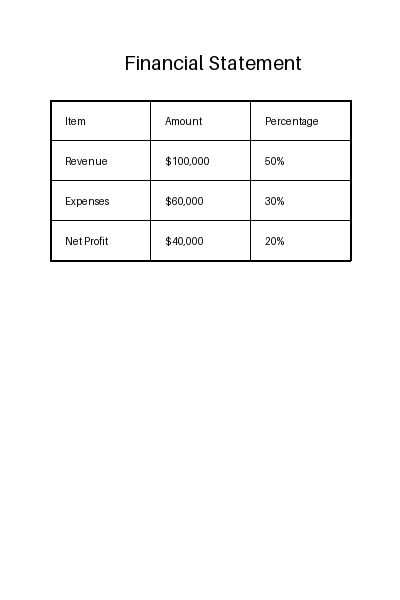

In [1]:
from PIL import Image, ImageDraw, ImageFont

def create_image():
    # 画像サイズを指定
    img_width, img_height = 400, 600
    # 背景色の指定（白）
    background_color = (255, 255, 255)
    # 画像の作成
    image = Image.new('RGB', (img_width, img_height), background_color)
    draw = ImageDraw.Draw(image)
    
    font = ImageFont.load_default()
    
    # タイトルの描画
    title = "Financial Statement"
    title_position = (img_width // 2 - len(title) * 4, 50)
    draw.text(title_position, title, fill=(0, 0, 0), font=ImageFont.load_default(size=20))

    width = 100
    margin = 15

    # 表のヘッダー部分
    headers = ["Item", "Amount", "Percentage"]
    header_position = (50, 100)
    for i, header in enumerate(headers):
        draw.text((header_position[0] + i * width + margin, header_position[1] + margin), header, fill=(0, 0, 0), font=font)
    
    # 表データの例
    data = [
        ("Revenue", "$100,000", "50%"),
        ("Expenses", "$60,000", "30%"),
        ("Net Profit", "$40,000", "20%")
    ]
    
    # 表の内容を描画
    for row, (item, amount, percentage) in enumerate(data):
        cols = (item, amount, percentage)
        for j, value in enumerate(cols):
            draw.text((header_position[0] + j * width + margin, header_position[1] + (row + 1) * 40 + margin), value, fill=(0, 0, 0), font=font)
    
    # 表の線を描画
    line_start_x, line_end_x = 50, 350
    row_idx = list(range(len(data) + 2))
    for i in range(len(data) + 2):
        y = header_position[1] + i * 40
        line_width = 2 if i in (min(row_idx), max(row_idx)) else 1
        draw.line([(line_start_x, y), (line_end_x, y)], fill=(0, 0, 0), width=line_width)
    
    # 垂直線を描画
    ncols = len(cols)
    col_idx = list(range(ncols + 1))
    for j in range(ncols + 1):
        line_width = 2 if j in (min(col_idx), max(col_idx)) else 1
        draw.line([(line_start_x + j * width, header_position[1]),
                   (line_start_x + j * width, header_position[1] + (len(data) + 1) * 40)],
                  fill=(0, 0, 0), width=line_width)
    return image

image = create_image()
image